In [34]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np

The extended Chynoweth equation tells us:
$$\alpha = ae^{-\frac{b}{E^c}}$$
where $E$ is the voltage. 

In [45]:
# # Define the Chynoweth Formulas

# def chyn_extended(x, a, b, c):
#     return a * np.exp(-b/(x**c))

# def chyn_simple(x, a, b):
#     return chyn_extended(x, a, b, 1)

def exp_simple(x,a,b):
    return 1 - a*np.exp(-b*x)

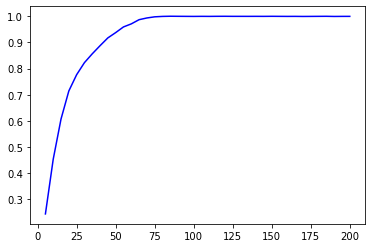

In [46]:
# Import Data

with open('pixel_output.txt') as f:
    lines = f.readlines()
    lines = lines[int(len(lines)/2)+1:] # Restrict to positive

    V = np.array([float(line.split()[0]) for line in lines])
    Q = np.array([float(line.split()[1]) for line in lines])

CCE = Q/max(Q) # normalize

plt.plot(V, CCE, 'b-', label='data')

0.99722223111164 0.05916892580924549
<ipython-input-45-f0ffdfea5727>:10: RuntimeWarning: overflow encountered in exp
  return 1 - a*np.exp(-b*x)


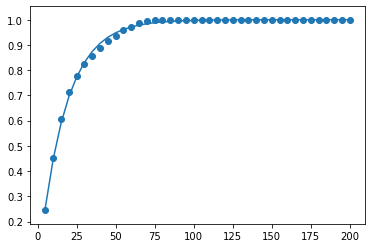

In [47]:
popt, pcov = curve_fit(exp_simple, V, CCE)
a_fit, b_fit = popt

print(a_fit,b_fit)

CCE_fit = exp_simple(V, a_fit, b_fit)

plt.scatter(V, CCE)
plt.plot(V, CCE_fit)